# Analyzing and Visualizing a Loan Dataset
## by Alf

## Preliminary Wrangling

> Briefly introduce your dataset here.

In [63]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

> Load in your dataset and describe its properties through the questions below.
Try and motivate your exploration goals through this section.

In [64]:
# pld will be short for prosperLoanData
pld = pd.read_csv('prosperLoanData.csv')

In [65]:
# show all of the columns
pd.options.display.max_columns = None
pld.head()

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,EstimatedEffectiveYield,EstimatedLoss,EstimatedReturn,ProsperRating (numeric),ProsperRating (Alpha),ProsperScore,ListingCategory (numeric),BorrowerState,Occupation,EmploymentStatus,EmploymentStatusDuration,IsBorrowerHomeowner,CurrentlyInGroup,GroupKey,DateCreditPulled,CreditScoreRangeLower,CreditScoreRangeUpper,FirstRecordedCreditLine,CurrentCreditLines,OpenCreditLines,TotalCreditLinespast7years,OpenRevolvingAccounts,OpenRevolvingMonthlyPayment,InquiriesLast6Months,TotalInquiries,CurrentDelinquencies,AmountDelinquent,DelinquenciesLast7Years,PublicRecordsLast10Years,PublicRecordsLast12Months,RevolvingCreditBalance,BankcardUtilization,AvailableBankcardCredit,TotalTrades,TradesNeverDelinquent (percentage),TradesOpenedLast6Months,DebtToIncomeRatio,IncomeRange,IncomeVerifiable,StatedMonthlyIncome,LoanKey,TotalProsperLoans,TotalProsperPaymentsBilled,OnTimeProsperPayments,ProsperPaymentsLessThanOneMonthLate,ProsperPaymentsOneMonthPlusLate,ProsperPrincipalBorrowed,ProsperPrincipalOutstanding,ScorexChangeAtTimeOfListing,LoanCurrentDaysDelinquent,LoanFirstDefaultedCycleNumber,LoanMonthsSinceOrigination,LoanNumber,LoanOriginalAmount,LoanOriginationDate,LoanOriginationQuarter,MemberKey,MonthlyLoanPayment,LP_CustomerPayments,LP_CustomerPrincipalPayments,LP_InterestandFees,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,C,36,Completed,2009-08-14 00:00:00,0.16516,0.1580,0.1380,NaN,NaN,NaN,NaN,NaN,NaN,0,CO,Other,Self-employed,2.0,True,True,NaN,2007-08-26 18:41:46.780000000,640.0,659.0,2001-10-11 00:00:00,5.0,4.0,12.0,1,24.0,3.0,3.0,2.0,472.0,4.0,0.0,0.0,0.0,0.00,1500.0,11.0,0.81,0.0,0.17,"$25,000-49,999",True,3083.333333,E33A3400205839220442E84,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,78,19141,9425,2007-09-12 00:00:00,Q3 2007,1F3E3376408759268057EDA,330.43,11396.14,9425.00,1971.14,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,NaN,36,Current,NaN,0.12016,0.0920,0.0820,0.07960,0.0249,0.05470,6.0,A,7.0,2,CO,Professional,Employed,44.0,False,False,NaN,2014-02-27 08:28:14,680.0,699.0,1996-03-18 00:00:00,14.0,14.0,29.0,13,389.0,3.0,5.0,0.0,0.0,0.0,1.0,0.0,3989.0,0.21,10266.0,29.0,1.00,2.0,0.18,"$50,000-74,999",True,6125.000000,9E3B37071505919926B1D82,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,0,134815,10000,2014-03-03 00:00:00,Q1 2014,1D13370546739025387B2F4,318.93,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090000000,HR,36,Completed,2009-12-17 00:00:00,0.28269,0.2750,0.2400,NaN,NaN,NaN,NaN,NaN,NaN,0,GA,Other,Not available,NaN,False,True,783C3371218786870A73D20,2007-01-02 14:09:10.060000000,480.0,499.0,2002-07-27 00:00:00,NaN,NaN,3.0,0,0.0,0.0,1.0,1.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.06,Not displayed,True,2083.333333,6954337960046817851BCB2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,86,6466,3001,2007-01-17 00:00:00,Q1 2007,5F7033715035555618FA612,123.32,4186.63,3001.00,1185.63,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41
3,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010000000,NaN,36,Current,NaN,0.12528,0.0974,0.0874,0.08490,0.0249,0.06000,6.0,A,9.0,16,GA,Skilled Labor,Employed,113.0,True,False,NaN,2012-10-22 11:02:32,800.0,819.0,1983-02-28 00:00:00,5.0,5.0,29.0,7,115.0,0.0,1.0,4.0,10056.0,14.0,0.0,0.0,1444.0,0.04,30754.0,26.0,0.76,0.0,0.15,"$25,000-49,999",True,2875.000000,A0393664465886295619C51,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,16,77296,10000,2012-11-01 00:00:00,Q4 2012,9ADE356069835475068C6D2,321.45,5143.20,4091.09,1052.11,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158
4,0F023589499656230C5E3E2,909464,2013-09-14 18:38:39.097000000,NaN,36,Current,NaN,0.24614,0.2085,0.1985,0.18316,0.0925,0.09066,3.0,D,4.0,2,MN

In [66]:
pld.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 81 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   ListingKey                           113937 non-null  object 
 1   ListingNumber                        113937 non-null  int64  
 2   ListingCreationDate                  113937 non-null  object 
 3   CreditGrade                          28953 non-null   object 
 4   Term                                 113937 non-null  int64  
 5   LoanStatus                           113937 non-null  object 
 6   ClosedDate                           55089 non-null   object 
 7   BorrowerAPR                          113912 non-null  float64
 8   BorrowerRate                         113937 non-null  float64
 9   LenderYield                          113937 non-null  float64
 10  EstimatedEffectiveYield              84853 non-null   float64
 11  EstimatedLoss

In [67]:
pld.shape

(113937, 81)

In [68]:
pld.describe()

,ListingNumber,Term,BorrowerAPR,BorrowerRate,LenderYield,EstimatedEffectiveYield,EstimatedLoss,EstimatedReturn,ProsperRating (numeric),ProsperScore,ListingCategory (numeric),EmploymentStatusDuration,CreditScoreRangeLower,CreditScoreRangeUpper,CurrentCreditLines,OpenCreditLines,TotalCreditLinespast7years,OpenRevolvingAccounts,OpenRevolvingMonthlyPayment,InquiriesLast6Months,TotalInquiries,CurrentDelinquencies,AmountDelinquent,DelinquenciesLast7Years,PublicRecordsLast10Years,PublicRecordsLast12Months,RevolvingCreditBalance,BankcardUtilization,AvailableBankcardCredit,TotalTrades,TradesNeverDelinquent (percentage),TradesOpenedLast6Months,DebtToIncomeRatio,StatedMonthlyIncome,TotalProsperLoans,TotalProsperPaymentsBilled,OnTimeProsperPayments,ProsperPaymentsLessThanOneMonthLate,ProsperPaymentsOneMonthPlusLate,ProsperPrincipalBorrowed,ProsperPrincipalOutstanding,ScorexChangeAtTimeOfListing,LoanCurrentDaysDelinquent,LoanFirstDefaultedCycleNumber,LoanMonthsSinceOrigination,LoanNumber,LoanOriginalAmount,MonthlyLoanPayment,LP_CustomerPayments,LP_CustomerPrincipalPayments,LP_InterestandFees,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
count,1.139370e+05,113937.000000,113912.000000,113937.000000,113937.000000,84853.000000,84853.000000,84853.000000,84853.000000,84853.000000,113937.000000,106312.000000,113346.000000,113346.000000,106333.000000,106333.000000,113240.000000,113937.00000,113937.000000,113240.000000,112778.000000,113240.000000,106315.000000,112947.000000,113240.000000,106333.000000,1.063330e+05,106333.000000,106393.000000,106393.000000,106393.000000,106393.000000,105383.000000,1.139370e+05,22085.000000,22085.000000,22085.000000,22085.000000,22085.000000,22085.000000,22085.000000,18928.000000,113937.000000,16952.000000,113937.000000,113937.000000,113937.00000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000
mean,6.278857e+05,40.830248,0.218828,0.192764,0.182701,0.168661,0.080306,0.096068,4.072243,5.950067,2.774209,96.071582,685.567731,704.567731,10.317192,9.260164,26.754539,6.96979,398.292161,1.435085,5.584405,0.592052,984.507059,4.154984,0.312646,0.015094,1.759871e+04,0.561309,11210.225447,23.230034,0.885897,0.802327,0.275947,5.608026e+03,1.421100,22.934345,22.271949,0.613629,0.048540,8472.311961,2930.313906,-3.223214,152.816539,16.268464,31.896882,69444.474271,8337.01385,272.475783,4183.079489,3105.536588,1077.542901,-54.725641,-14.242698,700.446342,681.420499,25.142686,0.998584,0.048027,0.023460,16.550751,80.475228
std,3.280762e+05,10.436212,0.080364,0.074818,0.074516,0.068467,0.046764,0.030403,1.673227,2.376501,3.996797,94.480605,66.458275,66.458275,5.457866,5.022644,13.637871,4.63097,447.159711,2.437507,6.429946,1.978707,7158.270157,10.160216,0.727868,0.154092,3.293640e+04,0.317918,19818.361309,11.871311,0.148179,1.097637,0.551759,7.478497e+03,0.764042,19.249584,18.830425,2.446827,0.556285,7395.507650,3806.635075,50.063567,466.320254,9.005898,29.974184,38930.479610,6245.80058,192.697812,4790.907234,4069.527670,1183.414168,60.675425,109.232758,2388.513831,2357.167068,275.657937,0.017919,0.332353,0.232412,294.545422,103.239020
min,4.000000e+00,12.000000,0.006530,0.000000,-0.010000,-0.182700,0.004900,-0.182700,1.000000,1.000000,0.000000,0.000000,0.000000,19.000000,0.000000,0.000000,2.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-209.000000,0.000000,0.000000,0.000000,1.000000,1000.00000,0.000000,-2.349900,0.000000,-2.349900,-664.870000,-9274.750000,-94.200000,-954.550000,0.000000,0.700000,0.000000,0.000000,0.000000,1.000000
25%,4.009190e+05,36.000000

In [69]:
#features_corr = ['Term', 'LoanStatus', 'BorrowerRate', 'LenderYield', 'ProsperRating (numeric)', 'ProsperScore', 'ListingCategory (numeric)', 'BorrowerState', 'EmploymentStatus', 'EmploymentStatusDuration', 'IsBorrowerHomeowner', 'CreditScoreRangeUpper', 'FirstRecordedCreditLine', 'CurrentCreditLines', 'OpenCreditLines', 'TotalCreditLinespast7years', 'OpenRevolvingAccounts', 'OpenRevolvingMonthlyPayment', 'InquiriesLast6Months', 'TotalInquiries', 'CurrentDelinquencies', 'AmountDelinquent', 'DelinquenciesLast7Years', 'PublicRecordsLast12Months', 'RevolvingCreditBalance', 'AvailableBankcardCredit', 'DebtToIncomeRatio', 'IncomeRange', 'IncomeVerifiable', 'StatedMonthlyIncome', 'LoanOriginalAmount', 'MonthlyLoanPayment']
features_corr = ['Term', 'LoanStatus', 'BorrowerRate', 'ProsperRating (numeric)', 'ListingCategory (numeric)', 'BorrowerState', 'EmploymentStatus', 'EmploymentStatusDuration', 'IsBorrowerHomeowner', 'CreditScoreRangeUpper', 'FirstRecordedCreditLine', 'CurrentCreditLines', 'InquiriesLast6Months', 'CurrentDelinquencies', 'AmountDelinquent', 'DelinquenciesLast7Years', 'PublicRecordsLast12Months', 'RevolvingCreditBalance', 'AvailableBankcardCredit', 'DebtToIncomeRatio', 'IncomeRange', 'StatedMonthlyIncome', 'LoanOriginalAmount']
temp2_df = pld[features_corr]
corr_big = temp2_df.corr()
corr_big

,Term,BorrowerRate,ProsperRating (numeric),ListingCategory (numeric),EmploymentStatusDuration,IsBorrowerHomeowner,CreditScoreRangeUpper,CurrentCreditLines,InquiriesLast6Months,CurrentDelinquencies,AmountDelinquent,DelinquenciesLast7Years,PublicRecordsLast12Months,RevolvingCreditBalance,AvailableBankcardCredit,DebtToIncomeRatio,StatedMonthlyIncome,LoanOriginalAmount
Term,1.000000,0.020085,0.079179,0.004947,0.082476,0.085339,0.126263,0.077072,-0.113568,-0.083807,-0.016459,-0.041492,-0.026252,0.026022,0.015348,-0.014670,0.028479,0.338927
BorrowerRate,0.020085,1.000000,-0.953105,0.102913,-0.019907,-0.134431,-0.461567,-0.097473,0.183810,0.176530,0.065645,0.170279,0.051169,-0.059608,-0.343861,0.062917,-0.088982,-0.328960
ProsperRating (numeric),0.079179,-0.953105,1.000000,-0.094474,0.036073,0.136470,0.548874,0.092377,-0.264305,-0.145205,-0.051071,-0.147149,-0.035791,0.062068,0.374432,-0.135344,0.094306,0.428557
ListingCategory (numeric),0.004947,0.102913,-0.094474,1.000000,-0.005544,-0.038224,0.102400,-0.105035,-0.072644,-0.049936,0.022202,0.016950,0.003167,-0.050053,-0.031517,-0.042754,0.001599,-0.127130
EmploymentStatusDuration,0.082476,-0.019907,0.036073,-0.005544,1.000000,0.171046,0.081134,0.140493,-0.048024,-0.009078,0.008185,0.012221,-0.003918,0.118320,0.053008,-0.011609,0.069830,0.098149
IsBorrowerHomeowner,0.085339,-0.134431,0.136470,-0.038224,0.171046,1.000000,0.293516,0.278295,0.006893,-0.055454,0.038122,-0.070798,-0.015016,0.224649,0.142039,0.000177,0.140051,0.206787
CreditScoreRangeUpper,0.126263,-0.461567,0.548874,0.102400,0.081134,0.293516,1.000000,0.142092,-0.262135,-0.368450,-0.065849,-0.251219,-0.083443,0.088848,0.453257,-0.013169,0.107901,0.340874
CurrentCreditLines,0.077072,-0.097473,0.092377,-0.105035,0.140493,0.278295,0.142092,1.000000,0.069662,-0.165860,-0.072590,-0.180398,-0.059379,0.333656,0.318165,0.091878,0.143329,0.201383
InquiriesLast6Months,-0.113568,0.183810,-0.264305,-0.072644,-0.048024,0.006893,-0.262135,0.069662,1.000000,0.156342,0.023969,0.090329,0.048873,-0.007397,-0.004564,0.024436,0.014854,-0.102878
CurrentDelinquencies,-0.083807,0.176530,-0.145205,-0.049936,-0.009078,-0.055454,-0.368450,-0.165860,0.156342,1.000000,0.340549,0.377777,0.111661,-0.088831,-0.092433,-0.024265,-0.038835,-0.172139


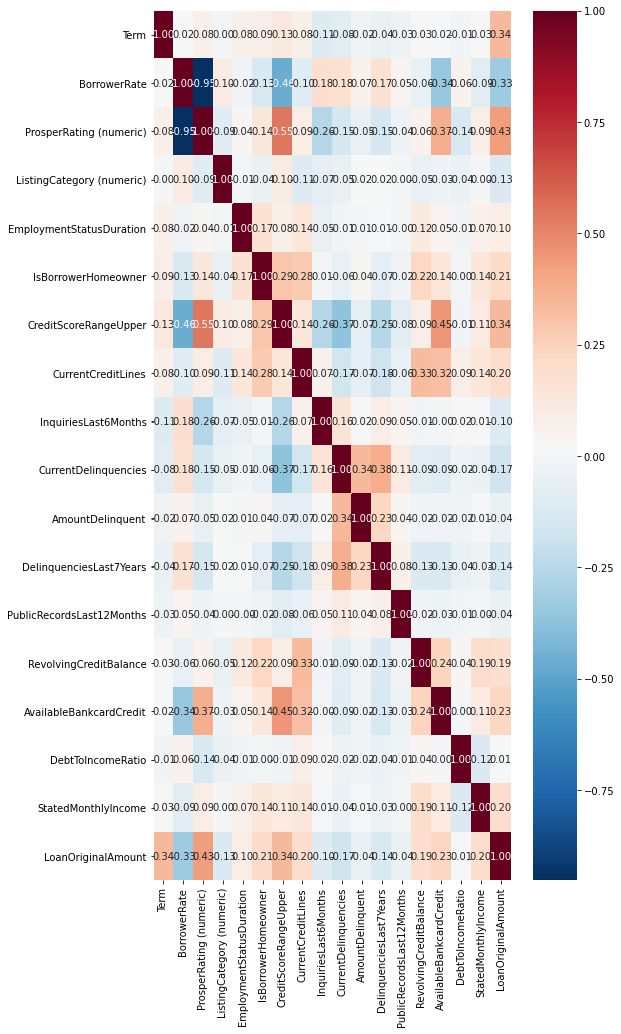

In [70]:
from seaborn import heatmap
fig, ax = plt.subplots(figsize=(8,16))
ax = heatmap(corr_big, fmt='.2f', annot=True, ax=ax, cmap='RdBu_r')
fig.savefig('corr.png', dpi=300, bbox_inches='tight')

In [71]:
pld.EmploymentStatus.value_counts()

Employed         67322
Full-time        26355
Self-employed     6134
Not available     5347
Other             3806
Part-time         1088
Not employed       835
Retired            795
Name: EmploymentStatus, dtype: int64

In [72]:
print(list(pld.columns))

['ListingKey', 'ListingNumber', 'ListingCreationDate', 'CreditGrade', 'Term', 'LoanStatus', 'ClosedDate', 'BorrowerAPR', 'BorrowerRate', 'LenderYield', 'EstimatedEffectiveYield', 'EstimatedLoss', 'EstimatedReturn', 'ProsperRating (numeric)', 'ProsperRating (Alpha)', 'ProsperScore', 'ListingCategory (numeric)', 'BorrowerState', 'Occupation', 'EmploymentStatus', 'EmploymentStatusDuration', 'IsBorrowerHomeowner', 'CurrentlyInGroup', 'GroupKey', 'DateCreditPulled', 'CreditScoreRangeLower', 'CreditScoreRangeUpper', 'FirstRecordedCreditLine', 'CurrentCreditLines', 'OpenCreditLines', 'TotalCreditLinespast7years', 'OpenRevolvingAccounts', 'OpenRevolvingMonthlyPayment', 'InquiriesLast6Months', 'TotalInquiries', 'CurrentDelinquencies', 'AmountDelinquent', 'DelinquenciesLast7Years', 'PublicRecordsLast10Years', 'PublicRecordsLast12Months', 'RevolvingCreditBalance', 'BankcardUtilization', 'AvailableBankcardCredit', 'TotalTrades', 'TradesNeverDelinquent (percentage)', 'TradesOpenedLast6Months', 'Deb

In [73]:
pld.ListingKey.nunique()

113066

In [74]:
# there are 113937 records and 113066 unique listing keys. I will verify quickly if these are duplicates.
key_counts = pld.ListingKey.value_counts()
key_counts

17A93590655669644DB4C06    6
349D3587495831350F0F648    4
8474358854651984137201C    4
DE8535960513435199406CE    4
47C1359638497431975670B    4
                          ..
518C33815767988652B1E57    1
0AEC35367832783240C339B    1
667633843967161545D8485    1
2E603572507357816C768FC    1
48EB34998286056643F5AC3    1
Name: ListingKey, Length: 113066, dtype: int64

In [75]:
key_counts.value_counts()

1    112239
2       790
3        32
4         4
6         1
Name: ListingKey, dtype: int64

In [84]:
dup_idx = pld[pld.ListingKey.duplicated()]['ListingKey']
print(type(dup_idx))
print(dup_idx[:10])

<class 'pandas.core.series.Series'>
9       0F043596202561788EA13D5
999     0A0635972629771021E38F3
2539    2D2635984503681189056B4
4942    4B7E3590031274113F1FD34
5812    94B035909835592957503E6
5971    2EC635885737984509D5366
6385    083235967773321272C26B9
7415    5A2F35875117483773421B0
7538    09AD35918712001025AC1BD
7555    021F3593082999771F5E621
Name: ListingKey, dtype: object


In [90]:
tt = dup_idx.tolist()
tt
len(tt)

871

In [100]:
dup_listing_idx = set(dup_idx.tolist())
len(dup_listing_idx)

827

##### Note:
dup_listing_idx are the listing keys that have duplicates. I will remove their duplicates but keep the first. I will then assign a -1 in their ProsperScore to mark them as to be "corrected"

In [91]:
sub_cols = ['ProsperScore', 'ListingKey', 'ListingNumber', 'ListingCreationDate', 'CreditGrade', 'Term', 'LoanStatus', 'ClosedDate', 'BorrowerAPR', 'BorrowerRate', 'LenderYield', 'EstimatedEffectiveYield', 'EstimatedLoss', 'EstimatedReturn', 'ProsperRating (numeric)', 'ProsperRating (Alpha)', 'ListingCategory (numeric)', 'BorrowerState', 'Occupation', 'EmploymentStatus', 'EmploymentStatusDuration', 'IsBorrowerHomeowner', 'CurrentlyInGroup', 'GroupKey', 'DateCreditPulled', 'CreditScoreRangeLower', 'CreditScoreRangeUpper', 'FirstRecordedCreditLine', 'CurrentCreditLines', 'OpenCreditLines', 'TotalCreditLinespast7years', 'OpenRevolvingAccounts', 'OpenRevolvingMonthlyPayment', 'InquiriesLast6Months', 'TotalInquiries', 'CurrentDelinquencies', 'AmountDelinquent', 'DelinquenciesLast7Years', 'PublicRecordsLast10Years', 'PublicRecordsLast12Months', 'RevolvingCreditBalance', 'BankcardUtilization', 'AvailableBankcardCredit', 'TotalTrades', 'TradesNeverDelinquent (percentage)', 'TradesOpenedLast6Months', 'DebtToIncomeRatio', 'IncomeRange', 'IncomeVerifiable', 'StatedMonthlyIncome', 'LoanKey', 'TotalProsperLoans', 'TotalProsperPaymentsBilled', 'OnTimeProsperPayments', 'ProsperPaymentsLessThanOneMonthLate', 'ProsperPaymentsOneMonthPlusLate', 'ProsperPrincipalBorrowed', 'ProsperPrincipalOutstanding', 'ScorexChangeAtTimeOfListing', 'LoanCurrentDaysDelinquent', 'LoanFirstDefaultedCycleNumber', 'LoanMonthsSinceOrigination', 'LoanNumber', 'LoanOriginalAmount', 'LoanOriginationDate', 'LoanOriginationQuarter', 'MemberKey', 'MonthlyLoanPayment', 'LP_CustomerPayments', 'LP_CustomerPrincipalPayments', 'LP_InterestandFees', 'LP_ServiceFees', 'LP_CollectionFees', 'LP_GrossPrincipalLoss', 'LP_NetPrincipalLoss', 'LP_NonPrincipalRecoverypayments', 'PercentFunded', 'Recommendations', 'InvestmentFromFriendsCount', 'InvestmentFromFriendsAmount', 'Investors']

In [92]:
check_dups_df = pld[pld.ListingKey == '17A93590655669644DB4C06']
# make sure that it is NOT spacing that makes a difference in non-duplicates
check_dups_df = check_dups_df.apply(lambda x: x.str.strip() if x.dtype == "object" else x)
#duplicaterows = check_dups_df[check_dups_df.duplicated(sub_cols)] 
#temp_df.to_csv('dupes.csv', index=None)

In [93]:
check_dups_df

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,EstimatedEffectiveYield,EstimatedLoss,EstimatedReturn,ProsperRating (numeric),ProsperRating (Alpha),ProsperScore,ListingCategory (numeric),BorrowerState,Occupation,EmploymentStatus,EmploymentStatusDuration,IsBorrowerHomeowner,CurrentlyInGroup,GroupKey,DateCreditPulled,CreditScoreRangeLower,CreditScoreRangeUpper,FirstRecordedCreditLine,CurrentCreditLines,OpenCreditLines,TotalCreditLinespast7years,OpenRevolvingAccounts,OpenRevolvingMonthlyPayment,InquiriesLast6Months,TotalInquiries,CurrentDelinquencies,AmountDelinquent,DelinquenciesLast7Years,PublicRecordsLast10Years,PublicRecordsLast12Months,RevolvingCreditBalance,BankcardUtilization,AvailableBankcardCredit,TotalTrades,TradesNeverDelinquent (percentage),TradesOpenedLast6Months,DebtToIncomeRatio,IncomeRange,IncomeVerifiable,StatedMonthlyIncome,LoanKey,TotalProsperLoans,TotalProsperPaymentsBilled,OnTimeProsperPayments,ProsperPaymentsLessThanOneMonthLate,ProsperPaymentsOneMonthPlusLate,ProsperPrincipalBorrowed,ProsperPrincipalOutstanding,ScorexChangeAtTimeOfListing,LoanCurrentDaysDelinquent,LoanFirstDefaultedCycleNumber,LoanMonthsSinceOrigination,LoanNumber,LoanOriginalAmount,LoanOriginationDate,LoanOriginationQuarter,MemberKey,MonthlyLoanPayment,LP_CustomerPayments,LP_CustomerPrincipalPayments,LP_InterestandFees,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
13078,17A93590655669644DB4C06,951186,2013-10-02 17:20:16.550000000,NaN,60,Current,NaN,0.16662,0.1435,0.1335,0.1264,0.0524,0.074,5.0,B,4.0,1,MD,Other,Employed,26.0,False,False,NaN,2013-12-23 09:38:12,720.0,739.0,1986-12-26 00:00:00,12.0,12.0,20.0,6,348.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,14635.0,0.57,10865.0,17.0,1.0,0.0,0.41,"$25,000-49,999",True,3000.0,CB1B37030986463208432A1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,2,126059,10000,2014-01-13 00:00:00,Q1 2014,F80D3694083622957BA09F2,234.5,234.5,112.62,121.88,-8.49,0.0,0.0,0.0,0.0,1.0,0,0,0.0,96
14888,17A93590655669644DB4C06,951186,2013-10-02 17:20:16.550000000,NaN,60,Current,NaN,0.16662,0.1435,0.1335,0.1264,0.0524,0.074,5.0,B,8.0,1,MD,Other,Employed,26.0,False,False,NaN,2013-12-23 09:38:12,720.0,739.0,1986-12-26 00:00:00,12.0,12.0,20.0,6,348.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,14635.0,0.57,10865.0,17.0,1.0,0.0,0.41,"$25,000-49,999",True,3000.0,CB1B37030986463208432A1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,2,126059,10000,2014-01-13 00:00:00,Q1 2014,F80D3694083622957BA09F2,234.5,234.5,112.62,121.88,-8.49,0.0,0.0,0.0,0.0,1.0,0,0,0.0,96
20569,17A93590655669644DB4C06,951186,2013-10-02 17:20:16.550000000,NaN,60,Current,NaN,0.16662,0.1435,0.1335,0.1264,0.0524,0.074,5.0,B,7.0,1,MD,Other,Employed,26.0,False,False,NaN,2013-12-23 09:38:12,720.0,739.0,1986-12-26 00:00:00,12.0,12.0,20.0,6,348.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,14635.0,0.57,10865.0,17.0,1.0,0.0,0.41,"$25,000-49,999",True,3000.0,CB1B37030986463208432A1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,2,126059,10000,2014-01-13 00:00:00,Q1 2014,F80D3694083622957BA09F2,234.5,234.5,112.62,121.88,-8.49,0.0,0.0,0.0,0.0,1.0,0,0,0.0,96
31450,17A93590655669644DB4C06,951186,2013-10-02 17:20:16.550000000,NaN,60,Current,NaN,0.16662,0.1435,0.1335,0.1264,0.0524,0.074,5.0,B,10.0,1,MD,Other,Employed,26.0,False,False,NaN,2013-12-23 09:38:12,720.0,739.0,1986-12-26 00:00:00,12.0,12.0,20.0,6,348.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,14635.0,0.57,10865.0,17.0,1.0,0.0,0.41,"$25,000-49,999",True,3000.0,CB1B37030986463208432A1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,2,126059,10000,2014-01-13 00:00:00,Q1 2014,F80D3694083622957BA09F2,234.5,234.5,112.62,121.88,-8.49,0.0,0.0,0.0,0.0,1.0,0,0,0.0,96
42750,17A93590655669644DB4C06,951186,2013-10-02 17:20:16.550000000,NaN,60,Current,NaN,0.16662,0.1435,0.1335,0.1264,0.0524,0.074,5.0,B,5.0,1,MD,Other,Employed,26.0,False,False,NaN,2013-12-23 09:38:12,720.0,739.0,1986-12-26 00:00

In [97]:
temp_cols = ['ListingKey', 'ListingNumber', 'ListingCreationDate', 'CreditGrade', 'Term', 'LoanStatus', 'ClosedDate', 'BorrowerAPR', 'BorrowerRate', 'LenderYield', 'EstimatedEffectiveYield', 'EstimatedLoss', 'EstimatedReturn', 'ProsperRating (numeric)', 'ProsperRating (Alpha)', 'ListingCategory (numeric)', 'BorrowerState', 'Occupation', 'EmploymentStatus', 'EmploymentStatusDuration', 'IsBorrowerHomeowner', 'CurrentlyInGroup', 'GroupKey', 'DateCreditPulled', 'CreditScoreRangeLower', 'CreditScoreRangeUpper', 'FirstRecordedCreditLine', 'CurrentCreditLines', 'OpenCreditLines', 'TotalCreditLinespast7years', 'OpenRevolvingAccounts', 'OpenRevolvingMonthlyPayment', 'InquiriesLast6Months', 'TotalInquiries', 'CurrentDelinquencies', 'AmountDelinquent', 'DelinquenciesLast7Years', 'PublicRecordsLast10Years', 'PublicRecordsLast12Months', 'RevolvingCreditBalance', 'BankcardUtilization', 'AvailableBankcardCredit', 'TotalTrades', 'TradesNeverDelinquent (percentage)', 'TradesOpenedLast6Months', 'DebtToIncomeRatio', 'IncomeRange', 'IncomeVerifiable', 'StatedMonthlyIncome', 'LoanKey', 'TotalProsperLoans', 'TotalProsperPaymentsBilled', 'OnTimeProsperPayments', 'ProsperPaymentsLessThanOneMonthLate', 'ProsperPaymentsOneMonthPlusLate', 'ProsperPrincipalBorrowed', 'ProsperPrincipalOutstanding', 'ScorexChangeAtTimeOfListing', 'LoanCurrentDaysDelinquent', 'LoanFirstDefaultedCycleNumber', 'LoanMonthsSinceOrigination', 'LoanNumber', 'LoanOriginalAmount', 'LoanOriginationDate', 'LoanOriginationQuarter', 'MemberKey', 'MonthlyLoanPayment', 'LP_CustomerPayments', 'LP_CustomerPrincipalPayments', 'LP_InterestandFees', 'LP_ServiceFees', 'LP_CollectionFees', 'LP_GrossPrincipalLoss', 'LP_NetPrincipalLoss', 'LP_NonPrincipalRecoverypayments', 'PercentFunded', 'Recommendations', 'InvestmentFromFriendsCount', 'InvestmentFromFriendsAmount', 'Investors']

In [98]:
# Exclude the column ProsperScore, then see if the duplicates are dropped
check_dups_df.drop_duplicates(subset=temp_cols, inplace=True, keep='first')

check_dups_df

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,EstimatedEffectiveYield,EstimatedLoss,EstimatedReturn,ProsperRating (numeric),ProsperRating (Alpha),ListingCategory (numeric),BorrowerState,Occupation,EmploymentStatus,EmploymentStatusDuration,IsBorrowerHomeowner,CurrentlyInGroup,GroupKey,DateCreditPulled,CreditScoreRangeLower,CreditScoreRangeUpper,FirstRecordedCreditLine,CurrentCreditLines,OpenCreditLines,TotalCreditLinespast7years,OpenRevolvingAccounts,OpenRevolvingMonthlyPayment,InquiriesLast6Months,TotalInquiries,CurrentDelinquencies,AmountDelinquent,DelinquenciesLast7Years,PublicRecordsLast10Years,PublicRecordsLast12Months,RevolvingCreditBalance,BankcardUtilization,AvailableBankcardCredit,TotalTrades,TradesNeverDelinquent (percentage),TradesOpenedLast6Months,DebtToIncomeRatio,IncomeRange,IncomeVerifiable,StatedMonthlyIncome,LoanKey,TotalProsperLoans,TotalProsperPaymentsBilled,OnTimeProsperPayments,ProsperPaymentsLessThanOneMonthLate,ProsperPaymentsOneMonthPlusLate,ProsperPrincipalBorrowed,ProsperPrincipalOutstanding,ScorexChangeAtTimeOfListing,LoanCurrentDaysDelinquent,LoanFirstDefaultedCycleNumber,LoanMonthsSinceOrigination,LoanNumber,LoanOriginalAmount,LoanOriginationDate,LoanOriginationQuarter,MemberKey,MonthlyLoanPayment,LP_CustomerPayments,LP_CustomerPrincipalPayments,LP_InterestandFees,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
13078,17A93590655669644DB4C06,951186,2013-10-02 17:20:16.550000000,NaN,60,Current,NaN,0.16662,0.1435,0.1335,0.1264,0.0524,0.074,5.0,B,1,MD,Other,Employed,26.0,False,False,NaN,2013-12-23 09:38:12,720.0,739.0,1986-12-26 00:00:00,12.0,12.0,20.0,6,348.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,14635.0,0.57,10865.0,17.0,1.0,0.0,0.41,"$25,000-49,999",True,3000.0,CB1B37030986463208432A1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,2,126059,10000,2014-01-13 00:00:00,Q1 2014,F80D3694083622957BA09F2,234.5,234.5,112.62,121.88,-8.49,0.0,0.0,0.0,0.0,1.0,0,0,0.0,96


#### Note

The rows above were identical except in column ProsperScore.
Although initially since they were inconsistently assigned, I thought they should be dropped.
I think now I will take the opportunity to see if I can correct these "errors"


In [101]:
pld.corr()

,ListingNumber,Term,BorrowerAPR,BorrowerRate,LenderYield,EstimatedEffectiveYield,EstimatedLoss,EstimatedReturn,ProsperRating (numeric),ProsperScore,ListingCategory (numeric),EmploymentStatusDuration,IsBorrowerHomeowner,CurrentlyInGroup,CreditScoreRangeLower,CreditScoreRangeUpper,CurrentCreditLines,OpenCreditLines,TotalCreditLinespast7years,OpenRevolvingAccounts,OpenRevolvingMonthlyPayment,InquiriesLast6Months,TotalInquiries,CurrentDelinquencies,AmountDelinquent,DelinquenciesLast7Years,PublicRecordsLast10Years,PublicRecordsLast12Months,RevolvingCreditBalance,BankcardUtilization,AvailableBankcardCredit,TotalTrades,TradesNeverDelinquent (percentage),TradesOpenedLast6Months,DebtToIncomeRatio,IncomeVerifiable,StatedMonthlyIncome,TotalProsperLoans,TotalProsperPaymentsBilled,OnTimeProsperPayments,ProsperPaymentsLessThanOneMonthLate,ProsperPaymentsOneMonthPlusLate,ProsperPrincipalBorrowed,ProsperPrincipalOutstanding,ScorexChangeAtTimeOfListing,LoanCurrentDaysDelinquent,LoanFirstDefaultedCycleNumber,LoanMonthsSinceOrigination,LoanNumber,LoanOriginalAmount,MonthlyLoanPayment,LP_CustomerPayments,LP_CustomerPrincipalPayments,LP_InterestandFees,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
ListingNumber,1.000000,0.319971,-0.031520,-0.114391,-0.113544,-0.217721,-0.239568,-0.461391,0.209200,-0.106235,0.127062,0.156224,0.076745,-0.439653,0.269395,0.269395,0.145621,0.195707,0.130369,0.232109,0.184101,-0.298941,-0.280228,-0.233326,-0.024627,-0.078336,-0.045467,-0.073151,0.057056,0.086053,0.036690,0.134729,0.254659,-0.084531,-0.041810,-0.024027,0.076113,0.174834,0.131672,0.132063,0.020873,-0.005101,0.252583,0.164248,-0.126409,-0.370226,-0.155062,-0.939179,0.995095,0.340360,0.277267,-0.380814,-0.366555,-0.281170,0.208286,0.104191,-0.251739,-0.247716,-0.096004,0.014688,-0.126031,-0.092813,-0.053481,-0.279659
Term,0.319971,1.000000,-0.011183,0.020085,0.020556,0.057047,-0.107140,0.152505,0.079179,0.028947,0.004947,0.082476,0.085339,-0.143751,0.126263,0.126263,0.077072,0.096309,0.076528,0.093637,0.084049,-0.113568,-0.103132,-0.083807,-0.016459,-0.041492,-0.029512,-0.026252,0.026022,0.031535,0.015348,0.079650,0.119342,-0.029476,-0.014670,0.040402,0.028479,0.070311,0.002462,0.003147,-0.002912,-0.008328,0.130493,0.153372,-0.048157,-0.134134,-0.070819,-0.342130,0.335610,0.338927,0.091026,-0.069696,-0.128255,0.158890,-0.167600,0.035841,-0.038353,-0.035981,-0.034157,-0.028806,-0.056680,-0.043507,-0.024472,-0.045137
BorrowerAPR,-0.031520,-0.011183,1.000000,0.989824,0.989329,0.895635,0.949538,0.794275,-0.962151,-0.668287,0.132456,-0.008589,-0.132823,-0.054567,-0.429707,-0.429707,-0.093481,-0.098860,0.002513,-0.110202,-0.043365,0.146119,0.114546,0.149404,0.065679,0.162225,0.122793,0.044095,-0.058539,0.261438,-0.348926,-0.041894,-0.241349,0.103527,0.056327,-0.109975,-0.082338,-0.041467,0.031399,0.018632,0.091034,0.055345,-0.206209,-0.090347,-0.231962,0.088032,-0.185956,-0.073773,-0.036269,-0.322887,-0.226653,-0.111350,-0.180445,0.169726,0.116974,-0.041452,0.067301,0.067385,0.028519,-0.028236,-0.044236,-0.046757,-0.031841,-0.307606
BorrowerRate,-0.114391,0.020085,0.989824,1.000000,0.999211,0.895282,0.945297,0.817670,-0.953105,-0.649736,0.102913,-0.019907,-0.134431,-0.001964,-0.461567,-0.461567,-0.097473,-0.105998,-0.005793,-0.125987,-0.055628,0.183810,0.153129,0.176530,0.065645,0.170279,0.128314,0.051169,-0.059608,0.255482,-0.343861,-0.048211,-0.261189,0.114538,0.062917,-0.099540,-0.088982,-0.049270,0.019217,0.006996,0.085770,0.050770,-0.206461,-0.085685,-0.217155,0.136244,-0.172936,0.020420,-0.118721,-0.328960,-0.244742,-0.081055,-0.153722,0.200479,0.095993,-0.053378,0.100635,0.100308,0.042059,-0.029025,-0.030579,-0.037312,-0.026512,-0.274217
LenderYield,-0.113544,0.020556,0.989329,0.999211,1.000000,0.895343,0.945308,0.817654,-0.953119,-0.649783,0.104395,-0.018954,-0.132993,-0.012683,-0.454350,-0.454350,-0.

In [102]:
# there is some strange inconsistency in way prosper give prosperscore.
# for example, the loan with listingkey 17A93590655669644DB4C06 has exactly the data in all the other columns
# EXCEPT for prosperScore which had 4, 8, 7, 10, 5, 6 in content. BIZARRE!!
# For that reason, I will drop the column prosperscore, and then drop_duplicates
len(temp_cols)

80

In [134]:
#tpld = pld.drop(['ProsperScore'], axis=1)
tpld = pld.copy()

In [135]:
tpld.shape

(113937, 81)

In [136]:
# trim spaces
tpld = tpld.apply(lambda x: x.str.strip() if x.dtype == "object" else x)

#### Note:

Before I remove the duplicated rows, I would like to record the range of prosperScores that the listing keys were assigned

In [199]:
# dup_listing_idx contains the keys that have duplicates: tpld.loc[dup_listing_idx]
lk_ps_df = tpld[tpld.ListingKey.isin(tt)][['ListingKey', 'ProsperScore']]

In [200]:
lk_ps_df = lk_ps_df.sort_values(by=['ListingKey', 'ProsperScore'])
lk_ps_df.count()

ListingKey      1698
ProsperScore    1698
dtype: int64

In [201]:
# create a new column ProsperScoreRange and set index to ListingKey
lk_ps_df['ProsperScoreRange'] = None
lk_ps_df = lk_ps_df.set_index(['ListingKey'])

In [202]:
# create a dictionary with key as ListingKey and the ProsperScore range as value
psr_dict = {}
for lk in dup_listing_idx:
    psr_dict[lk] = lk_ps_df.loc[lk]['ProsperScore'].tolist()
list(psr_dict.items())[:10]

[('CF633586582845136D54BCF', [9.0, 11.0]),
 ('A0E03600580145778738628', [3.0, 4.0]),
 ('2418360247113873074234B', [2.0, 4.0]),
 ('89AA3600249092420F73B61', [3.0, 4.0]),
 ('FFE13600149501913291BF7', [2.0, 4.0]),
 ('359F36006583392169BF3F3', [4.0, 5.0]),
 ('733936042716020958A843D', [4.0, 5.0]),
 ('C17535874571157867FA321', [4.0, 9.0]),
 ('1A8D36023381533169217DC', [7.0, 8.0]),
 ('4AED359809095985758FB75', [3.0, 9.0])]

In [203]:
# place all the new range value from the dictionary into dataframe
for k, v in psr_dict.items():
    vstr = [str(i) for i in v]
    yy = ",".join(vstr)
    lk_ps_df.loc[k, 'ProsperScoreRange'] = yy

In [204]:
lk_ps_df.head(10)

,ProsperScore,ProsperScoreRange
ListingKey,,
00223594917038064A7C947,5.0,"5.0,6.0"
00223594917038064A7C947,6.0,"5.0,6.0"
00473590513960687DD308F,4.0,"4.0,6.0"
00473590513960687DD308F,6.0,"4.0,6.0"
0098360461900952056DB93,2.0,"2.0,4.0"
0098360461900952056DB93,4.0,"2.0,4.0"
01163604029146842E28D9C,2.0,"2.0,3.0"
01163604029146842E28D9C,3.0,"2.0,3.0"
014F35910923350802E1B29,4.0,"4.0,7.0"


In [205]:
# reset the index then drop the column ProsperScore
lk_ps_df.reset_index(inplace=True)
lk_ps_df = lk_ps_df.drop(['ProsperScore'], axis=1)

In [206]:
lk_ps_df.head()

,ListingKey,ProsperScoreRange
0,00223594917038064A7C947,"5.0,6.0"
1,00223594917038064A7C947,"5.0,6.0"
2,00473590513960687DD308F,"4.0,6.0"
3,00473590513960687DD308F,"4.0,6.0"
4,0098360461900952056DB93,"2.0,4.0"


In [207]:
# now remove all the duplicates on ListingKey
lk_ps_df.drop_duplicates(subset=['ListingKey'], inplace=True, keep='first')

In [208]:
lk_ps_df.head()

,ListingKey,ProsperScoreRange
0,00223594917038064A7C947,"5.0,6.0"
2,00473590513960687DD308F,"4.0,6.0"
4,0098360461900952056DB93,"2.0,4.0"
6,01163604029146842E28D9C,"2.0,3.0"
8,014F35910923350802E1B29,"4.0,7.0"


In [210]:
# quickly examine the listing keys
duplicaterows = tpld[tpld.duplicated(temp_cols)]
duplicaterows.ListingKey.value_counts()

17A93590655669644DB4C06    5
DE8535960513435199406CE    3
8474358854651984137201C    3
47C1359638497431975670B    3
349D3587495831350F0F648    3
                          ..
9A9F35950402943800CFCC0    1
22483591008815915DF5689    1
E96935954881487190BF84E    1
163A35932924340001C4F7D    1
CF633586582845136D54BCF    1
Name: ListingKey, Length: 827, dtype: int64

In [211]:
# backup tpld
tpld_backup = tpld.copy()

In [212]:
# drop all the duplicates in tpld based on temp_cols subset (i.e., without ProsperScore)
tpld.drop_duplicates(subset=temp_cols, inplace=True, keep='first')

In [ ]:
# merge the two df tpld and lk_ps_df on ListingKey

In [57]:
new_key_counts = tpld.ListingKey.value_counts()
new_key_counts.value_counts()

1    113066
Name: ListingKey, dtype: int64

In [58]:
tpld.shape

(113066, 80)

In [ ]:
twitarch_work.loc[combo_idx, 'dog_stage'] = 'combo-' + twitarch_work['dog_stage']

In [59]:
tpld['ProsperRating (Alpha)'].value_counts()

C     18096
B     15368
A     14390
D     14170
E      9716
HR     6917
AA     5325
Name: ProsperRating (Alpha), dtype: int64

In [60]:
tpld['ProsperRating (numeric)'].value_counts()

4.0    18096
5.0    15368
6.0    14390
3.0    14170
2.0     9716
1.0     6917
7.0     5325
Name: ProsperRating (numeric), dtype: int64

In [61]:
# Now the number of records match with that that was obtained from number of unique in origina dataframe

In [62]:
t = key_counts.index
t

Index(['17A93590655669644DB4C06', '349D3587495831350F0F648',
       '8474358854651984137201C', 'DE8535960513435199406CE',
       '47C1359638497431975670B', '77AA3592626533086F04AAA',
       '78D835971025680406A3489', '1CF43590627610277373CFE',
       '0A0635972629771021E38F3', '8E40358782357887276FED9',
       ...
       '1FE43602760844783797E37', '30FA355240025026584CD55',
       'D29135447454194965F4A9D', '375835500996345010AB747',
       '292D3597676473491C8C6AD', '518C33815767988652B1E57',
       '0AEC35367832783240C339B', '667633843967161545D8485',
       '2E603572507357816C768FC', '48EB34998286056643F5AC3'],
      dtype='object', length=113066)

In [29]:
pld.shape[0] - tpld.shape[0]

871

In [ ]:
sb.lmplot(data=df, x='ProsperRating', y='BorrowerRate', x_jitter=.05)

In [ ]:
#select_features = ['EmploymentStatus', 'LoanOriginalAmount', 'CreditScoreRangeUpper', 'LoanStatus', 'BorrowerRate', 'StatedMonthlyIncome', 'ProsperRating (numeric)', 'ListingCategory (numeric)', 'IsBorrowerHomeowner']
select_features = ['EmploymentStatusDuration', 'EmploymentStatus', 'LoanOriginalAmount', 'ProsperRating (numeric)', 'BorrowerRate', 'CreditScoreRangeUpper', 'CurrentDelinquencies', 'IsBorrowerHomeowner', 'CurrentCreditLines', 'AvailableBankcardCredit']
df = pld[select_features]
df.info()

In [ ]:
df.shape

In [ ]:
# There is a lot of nulls. what to do?
# drop listingnumber, borrowerapr (seems similar to borrowerrate), Investmentfromfriendscount, investmentfromfriendsamount,
# percentfunded (nearly 100%)
df.corr()

In [ ]:
df.describe()

In [ ]:
df.isnull().sum()

### What is the structure of your dataset?

The original dataset had (113937, 81). After discovering that Prosper had inconsistencies in using the feature ProsperScore, I deleted that column. I then dropped all the duplicated rows but keeping the first among the duplicated. The new shape is (113066, 80). With the selected features, the final shape is (113066, 9)

### What is/are the main feature(s) of interest in your dataset?

ProsperRating feature is interesting. I would like to see if it's predictable based on some features. The BorrowerRate is highly correlated to ProsperRating so I believe BorrowerRate is derivative. I would like to keep track of these 2 features based on the features below.

Initially, I was interested in predicting ProsperRating. It is however highly correlative to BorrowerRate. One is derived from the other. But some samples do not have ProsperRating but they all have BorrowerRate. If I choose to predict ProsperRating, it would be a classification problem. If I choose BorrowerRate, it would be a regression problem.

'EmploymentStatusDuration', 'LoanOriginalAmount', 'CreditScoreRangeUpper', 'CurrentDelinquencies', 'IsBorrowerHomeowner', 'CurrentCreditLines', 'AvailableBankcardCredit', 'BorrowerRate', 'ProsperRating (numeric)'


### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

I will investigate the following features.
'EmploymentStatusDuration', 'LoanOriginalAmount', 'CreditScoreRangeUpper', 'CurrentDelinquencies', 'IsBorrowerHomeowner', 'CurrentCreditLines', 'AvailableBankcardCredit'

And keep track of these 2 features against the features above.
'BorrowerRate', 'ProsperRating (numeric)'

In [ ]:
df = df.rename(columns={'ProsperRating (numeric)': 'ProsperRating'})

## Univariate Exploration

> In this section, investigate distributions of individual variables. If
you see unusual points or outliers, take a deeper look to clean things up
and prepare yourself to look at relationships between variables.

In [ ]:
#fig, ax = plt.subplots(figsize=(10,8))
#df.EmploymentStatus.plot(kind='bar', ax=ax)
#plt.show();
plt.figure(figsize=(10,8))
pleasant = sb.color_palette()[0]
sb.countplot(data = df, x='EmploymentStatus', color=pleasant)
plt.xticks(rotation=45, horizontalalignment='right')
plt.show()

## Althought I will compare in bivariate analysis later the relationship between EmploymentStatus and EmloymentStatusDuration, I will do them here one-by-one first.

In [ ]:
plt.figure(figsize=(10,8))
sb.histplot(data=df, x='EmploymentStatusDuration', color=pleasant, bins=100)
plt.xscale('log')
plt.xlabel('Employment Duration in months')

right-skewed. Most people worked below 100 months in their current employment status

> Make sure that, after every plot or related series of plots, that you
include a Markdown cell with comments about what you observed, and what
you plan on investigating next.

In [ ]:
sb.countplot(data=df, x='ProsperRating', color=pleasant)

In [ ]:
plt.figure(figsize=(10,8))
sb.histplot(data=df, x='BorrowerRate', color=pleasant)

This seems to be ordinal. It is not clear to me whether 1 or 7 is worse. I will examine further. However, it seems to be a normal distribution. The Prosper Loan Dictionary did not specify which one is best.

In [ ]:
plt.figure(figsize=(10,8))
sb.distplot(x=df.BorrowerRate, color=pleasant)

There's a lot of humps here. multimodal. It seems most loans had borrower rate between .1 and .2. However, there are also many between .2 and .3 and a really huge hump just above .3.

In [ ]:
fig, ax = plt.subplots(figsize=(12,10))
df.hist(['LoanOriginalAmount', 'CreditScoreRangeUpper', 'CurrentDelinquencies', 'CurrentCreditLines', 'AvailableBankcardCredit'], ax=ax);

In [ ]:
plt.figure(figsize=(10,8))
sb.countplot(data=df, x='CurrentCreditLines', color=pleasant)
plt.xticks(rotation=90);

right-skewed

In [ ]:
plt.figure(figsize=(10,8))
sb.histplot(data=df, x='LoanOriginalAmount', color=pleasant, bins=100)
#plt.xscale('log')
#plt.xlabel('Employment Duration in months')

In [ ]:
sb.countplot(data=df, x='IsBorrowerHomeowner', color=pleasant);

In [ ]:
df.IsBorrowerHomeowner.value_counts()

There are about as many homeowners than not.

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> Your answer here!

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> Your answer here!

## Bivariate Exploration

> In this section, investigate relationships between pairs of variables in your
data. Make sure the variables that you cover here have been introduced in some
fashion in the previous section (univariate exploration).

In [ ]:
sb.heatmap(df.corr(), fmt='.2f', annot=True, cmap='RdBu_r')

BorrowerRate and ProsperRating are highly correlative. Since all loans have a BorrowerRate, I believe that these 2 features are determined simultaneously based on all the other features.

In [ ]:
sb.lmplot(data=df, x='ProsperRating', y='BorrowerRate', x_jitter=.05)

#sb.pairplot(df, kind='reg', plot_kws={'line_kws':{'color':'red'}, 'scatter_kws': {'alpha': 0.1}})

In [ ]:
sb.catplot(data=df, x='ProsperRating', y='BorrowerRate', color=pleasant, alpha=0.1)

I drew the graph first with the line and then a form of a scatterplot indicating density of points. It is clear to me now that ProsperRating is ordinal. The higher the ProsperRating the lower the BorrowerRate.

In [ ]:
temp_df = df[['BorrowerRate', 'ProsperRating']]
temp_df.isnull().sum()

In [ ]:
temp_df = temp_df.dropna()
temp_df.isnull().sum()

In [ ]:
sb.lmplot(data=temp_df.sample(1000), x='ProsperRating', y='BorrowerRate', x_jitter=.05)

In [ ]:
sb.catplot(data=df, x='EmploymentStatus', y='EmploymentStatusDuration', color=pleasant, alpha=0.1)
plt.xticks(rotation=45, horizontalalignment='right')

I thought there might be a relationship between emploment status and duration. I don't see much.

In [ ]:
sb.catplot(data=df, x='EmploymentStatus', y='BorrowerRate', color=pleasant, alpha=0.1)
plt.xticks(rotation=45, horizontalalignment='right')

there's a definite range of rates given to the first 5 statuses.

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> Your answer here!

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> Your answer here!

## Multivariate Exploration

> Create plots of three or more variables to investigate your data even
further. Make sure that your investigations are justified, and follow from
your work in the previous sections.

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> Your answer here!

### Were there any interesting or surprising interactions between features?

> Your answer here!

> At the end of your report, make sure that you export the notebook as an
html file from the `File > Download as... > HTML` menu. Make sure you keep
track of where the exported file goes, so you can put it in the same folder
as this notebook for project submission. Also, make sure you remove all of
the quote-formatted guide notes like this one before you finish your report!